In [1]:
from google.colab import drive

drive.mount("/content/drive")

Mounted at /content/drive


In [2]:
import torch
import random
import numpy as np
import pandas as pd

torch.manual_seed(31)
random.seed(31)
np.random.seed(31)

In [3]:
!pip install -U bnlp_toolkit

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 8.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.1/53.1 kB 5.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 175.4/175.4 kB 7.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 993.5/993.5 kB 12.2 MB/s eta 0:00:00
  Created wheel for emoji: filename=emoji-1.7.0-py3-none-any.whl size=171033 sha256=5a3d3ad234ef37c928dcacd89c94b28d889c7c6584e9dddaca4576d378cafcec
  Stored in directory: /root/.cache/pip/wheels/31/8a/8c/315c9e5d7773f74b33d5ed33f075b49c6eaeb7cedbb86e2cf8
Successfully built emoji


In [4]:
!git clone https://github.com/sagorbrur/bnlp.git

Cloning into 'bnlp'...
remote: Enumerating objects: 2048, done.
remote: Counting objects: 100% (571/571), done.
remote: Compressing objects: 100% (249/249), done.
remote: Total 2048 (delta 337), reused 520 (delta 317), pack-reused 1477
Receiving objects: 100% (2048/2048), 22.74 MiB | 22.79 MiB/s, done.
Resolving deltas: 100% (1215/1215), done.


## Download the dataset

In [5]:
train = pd.read_csv("/content/drive/MyDrive/research/emnlp_blp_2023/task_1/data/train.csv")
train

,text,label
0,যে দেশে সন্ত্রাসরা দেশ চালায়সে দেশে শান্তি কিভ...,1
1,এই বিচার শেষ বিচার নয়।আসল বিচার হবে আল্লাহর আদ...,0
2,আরব দেশগুলোকে বলব ভারতের সাথে সব ব্যবসা বাণিজ্...,2
3,দেশটা সুস্থ নাই,0
4,আপনার কথা দুঃখ জনক আগে বিডিও থাকলে কেন ধরা হলন...,0
...,...,...
2695,"হল বন্ধ করার আগে নিউমার্কেট বন্ধ করা উচিৎ,,।",2
2696,এ স্বাধীন দেশে ভোটটা অন্ততঃ আমাদের দিতে দেন।জা...,0
2697,আল হামদুলিল্লাহ্...প্রিয় ভিউয়ার্স আপনাদের ভালব...,0
2698,এই গুলা ত বিচার করবায় ঐ তোমরা ত ইন্ডিয়ান না,0


## POS Tag List for each Class


In [ ]:
from bnlp import POS
bn_pos = POS()
model_path = "/content/bnlp/model/bn_pos.pkl"
text = "আমি ভাত খাই।" # or you can pass ['আমি', 'ভাত', 'খাই', '।']
res = bn_pos.tag(model_path, text)
print(res)
# [('আমি', 'PPR'), ('ভাত', 'NC'), ('খাই', 'VM'), ('।', 'PU')]

punkt not found. downloading...


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
If you are using version <=3.3.2 please specify bnlp_toolkit with exact version, otherwise it will raises error in the upcoming version. 
To migrate feel free to checkout the newer version (4.0.0). It will release soon as beta.


[('আমি', 'PPR'), ('ভাত', 'NC'), ('খাই', 'VM'), ('।', 'PU')]


In [ ]:
class_0 = train[train["label"]==0]
class_1 = train[train["label"]==1]
class_2 = train[train["label"]==2]
print(f"Distribution:\nclass 0 : {len(class_0)}\nclass 1 : {len(class_1)}\nclass 2 : {len(class_2)}")

Distribution:
class 0 : 1389
class 1 : 922
class 2 : 389


In [ ]:
print(bn_pos.tag(model_path,"ইন্ডিয়া ধ্বংস হোক"))
print(bn_pos.tag(model_path,"পাডা পুতার মাঝখানে পরে সাধারণ ২ মানুষের জিবন শেষ আর এর বিচার কোনো দিন হবে না"))


[('ইন্ডিয়া', 'NP'), ('ধ্বংস', 'NC'), ('হোক', 'VM')]
[('পাডা', 'NC'), ('পুতার', 'NC'), ('মাঝখানে', 'NC'), ('পরে', 'NST'), ('সাধারণ', 'JJ'), ('২', 'NC'), ('মানুষের', 'NC'), ('জিবন', 'NC'), ('শেষ', 'NST'), ('আর', 'CCD'), ('এর', 'PPR'), ('বিচার', 'NC'), ('কোনো', 'JQ'), ('দিন', 'NC'), ('হবে', 'VM'), ('না', 'CX')]


In [ ]:
def POS_list(text_list):
  class_x = {}
  for text in text_list:
    res = bn_pos.tag(model_path, text)
    for t in res:
      if t[1] not in class_x.keys():
        class_x[t[1]] = 1
      else:
        class_x[t[1]] += 1

  return class_x

In [ ]:
print(bn_pos.tag(model_path,"ইন্ডিয়া ধ্বংস হোক"))

[('ইন্ডিয়া', 'NP'), ('ধ্বংস', 'NC'), ('হোক', 'VM')]


In [ ]:
POS_list(["ইন্ডিয়া ধ্বংস হোক",
          "পাডা পুতার মাঝখানে পরে সাধারণ ২ মানুষের জিবন শেষ আর এর বিচার কোনো দিন হবে না"])

{'NP': 1,
 'NC': 9,
 'VM': 2,
 'NST': 2,
 'JJ': 1,
 'CCD': 1,
 'PPR': 1,
 'JQ': 1,
 'CX': 1}

In [ ]:
class_0_pos = POS_list(list(class_0['text']))
class_1_pos = POS_list(list(class_1['text']))
class_2_pos = POS_list(list(class_2['text']))

In [ ]:
class_0_pos = dict(sorted(class_0_pos.items(), key=lambda item: item[1], reverse=True))
class_1_pos = dict(sorted(class_1_pos.items(), key=lambda item: item[1], reverse=True))
class_2_pos = dict(sorted(class_2_pos.items(), key=lambda item: item[1], reverse=True))


In [ ]:
class_0_pos

{'NC': 10073,
 'VM': 3140,
 'PU': 2021,
 'PPR': 1745,
 'JJ': 1492,
 'JQ': 976,
 'NP': 823,
 'CX': 707,
 'NV': 607,
 'VAUX': 575,
 'PP': 482,
 'CCD': 411,
 'DAB': 384,
 'CSB': 378,
 'PWH': 374,
 'NST': 302,
 'ALC': 289,
 'RDX': 261,
 'AMN': 179,
 'PRL': 161,
 'LC': 148,
 'RDF': 108,
 'RDS': 76,
 'DRL': 62,
 'PRF': 54,
 'CIN': 5,
 'CCL': 4}

<Axes: >

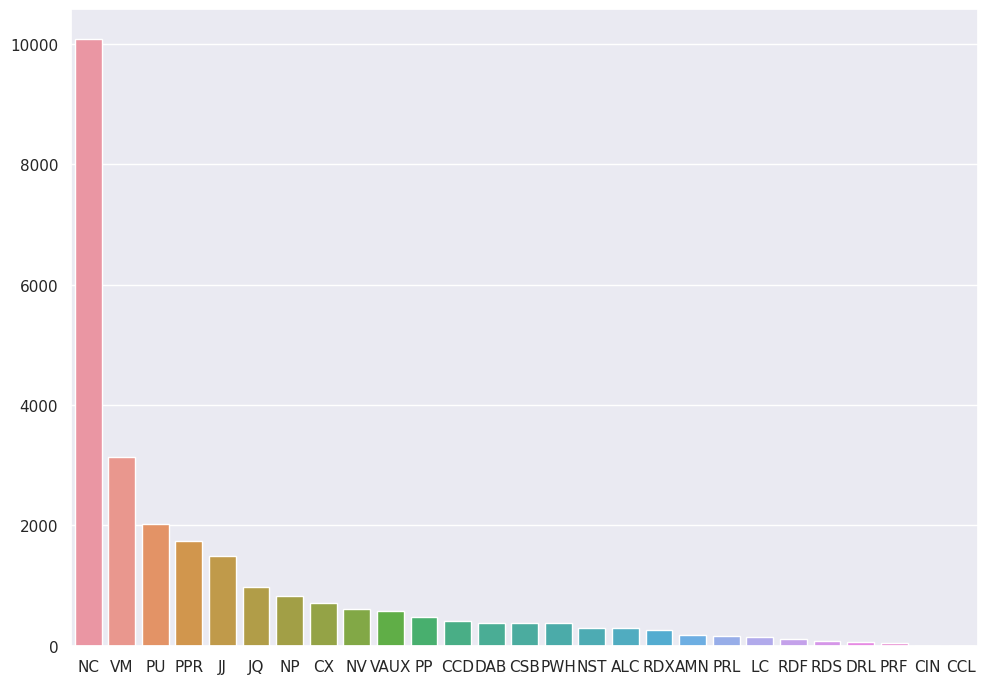

In [ ]:
import seaborn as sns

keys = list(class_0_pos.keys())
# print(keys)
values = [class_0_pos[k] for k in keys]
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.barplot(x=keys,y=values)


<Axes: >

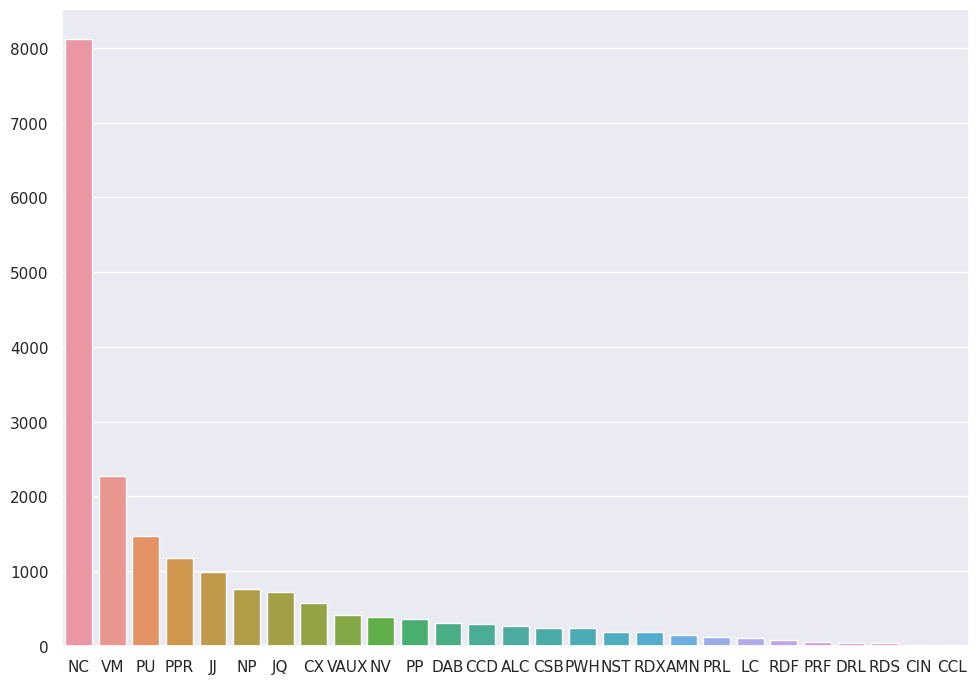

In [ ]:
keys = list(class_1_pos.keys())
# print(keys)
values = [class_1_pos[k] for k in keys]
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.barplot(x=keys,y=values)


<Axes: >

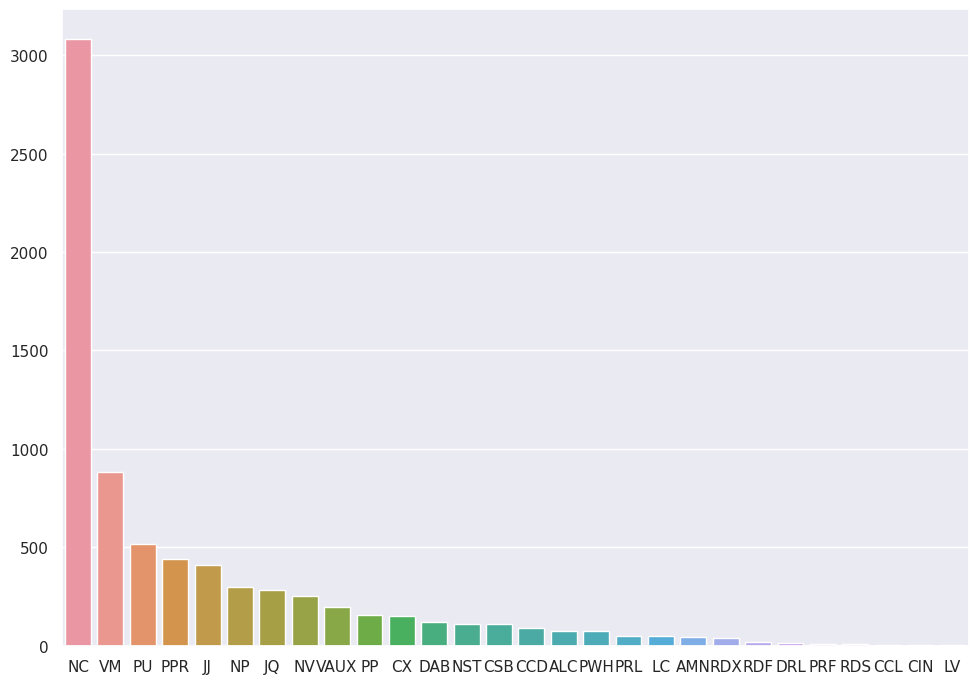

In [ ]:
keys = list(class_2_pos.keys())
# print(keys)
values = [class_2_pos[k] for k in keys]
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.barplot(x=keys,y=values)


In [ ]:
# {'PPR': 1, 'NC': 1, 'VM': 1, 'PU': 1}

## Token Length Investigation

In [ ]:
from bnlp import BasicTokenizer

basic_tokenizer = BasicTokenizer()
raw_text = "আমি বাংলায় গান গাই।"
tokens = basic_tokenizer.tokenize(raw_text)
print(tokens)

# output: ["আমি", "বাংলায়", "গান", "গাই", "।"]

['আমি', 'বাংলায়', 'গান', 'গাই', '।']


In [ ]:
train["tokens"] = train["text"].apply(basic_tokenizer.tokenize)

In [ ]:
train

,text,label,tokens
0,যে দেশে সন্ত্রাসরা দেশ চালায়সে দেশে শান্তি কিভ...,1,"[যে, দেশে, সন্ত্রাসরা, দেশ, চালায়সে, দেশে, শান..."
1,এই বিচার শেষ বিচার নয়।আসল বিচার হবে আল্লাহর আদ...,0,"[এই, বিচার, শেষ, বিচার, নয়, ।, আসল, বিচার, হবে..."
2,আরব দেশগুলোকে বলব ভারতের সাথে সব ব্যবসা বাণিজ্...,2,"[আরব, দেশগুলোকে, বলব, ভারতের, সাথে, সব, ব্যবসা..."
3,দেশটা সুস্থ নাই,0,"[দেশটা, সুস্থ, নাই]"
4,আপনার কথা দুঃখ জনক আগে বিডিও থাকলে কেন ধরা হলন...,0,"[আপনার, কথা, দুঃখ, জনক, আগে, বিডিও, থাকলে, কেন..."
...,...,...,...
2695,"হল বন্ধ করার আগে নিউমার্কেট বন্ধ করা উচিৎ,,।",2,"[হল, বন্ধ, করার, আগে, নিউমার্কেট, বন্ধ, করা, উ..."
2696,এ স্বাধীন দেশে ভোটটা অন্ততঃ আমাদের দিতে দেন।জা...,0,"[এ, স্বাধীন, দেশে, ভোটটা, অন্ততঃ, আমাদের, দিতে..."
2697,আল হামদুলিল্লাহ্...প্রিয় ভিউয়ার্স আপনাদের ভালব...,0,"[আল, হামদুলিল্লাহ্, ., ., ., প্রিয়, ভিউয়ার্স, ..."
2698,এই গুলা ত বিচার করবায় ঐ তোমরা ত ইন্ডিয়ান না,0,"[এই, গুলা, ত, বিচার, করবায়, ঐ, তোমরা, ত, ইন্ডি..."


In [ ]:
train["token_length"] = train["tokens"].apply(len)

In [ ]:
train

,text,label,tokens,token_length
0,যে দেশে সন্ত্রাসরা দেশ চালায়সে দেশে শান্তি কিভ...,1,"[যে, দেশে, সন্ত্রাসরা, দেশ, চালায়সে, দেশে, শান...",11
1,এই বিচার শেষ বিচার নয়।আসল বিচার হবে আল্লাহর আদ...,0,"[এই, বিচার, শেষ, বিচার, নয়, ।, আসল, বিচার, হবে...",18
2,আরব দেশগুলোকে বলব ভারতের সাথে সব ব্যবসা বাণিজ্...,2,"[আরব, দেশগুলোকে, বলব, ভারতের, সাথে, সব, ব্যবসা...",22
3,দেশটা সুস্থ নাই,0,"[দেশটা, সুস্থ, নাই]",3
4,আপনার কথা দুঃখ জনক আগে বিডিও থাকলে কেন ধরা হলন...,0,"[আপনার, কথা, দুঃখ, জনক, আগে, বিডিও, থাকলে, কেন...",16
...,...,...,...,...
2695,"হল বন্ধ করার আগে নিউমার্কেট বন্ধ করা উচিৎ,,।",2,"[হল, বন্ধ, করার, আগে, নিউমার্কেট, বন্ধ, করা, উ...",11
2696,এ স্বাধীন দেশে ভোটটা অন্ততঃ আমাদের দিতে দেন।জা...,0,"[এ, স্বাধীন, দেশে, ভোটটা, অন্ততঃ, আমাদের, দিতে...",49
2697,আল হামদুলিল্লাহ্...প্রিয় ভিউয়ার্স আপনাদের ভালব...,0,"[আল, হামদুলিল্লাহ্, ., ., ., প্রিয়, ভিউয়ার্স, ...",27
2698,এই গুলা ত বিচার করবায় ঐ তোমরা ত ইন্ডিয়ান না,0,"[এই, গুলা, ত, বিচার, করবায়, ঐ, তোমরা, ত, ইন্ডি...",10


In [ ]:
class_0 = train[train["label"]==0]
class_1 = train[train["label"]==1]
class_2 = train[train["label"]==2]

In [ ]:
class_0_TL = list(class_0["token_length"])
class_1_TL = list(class_1["token_length"])
class_2_TL = list(class_2["token_length"])

In [ ]:
import statistics

In [ ]:
print("class 0 token length stats")
print(f"Mean : {statistics.mean(class_0_TL)}")
print(f"Median : {statistics.median(class_0_TL)}")
print(f"Standard Deviation : {statistics.stdev(class_0_TL)}")
print(f"Minimum : {min(class_0_TL)}")
print(f"Maximum : {max(class_0_TL)}")

class 0 token length stats
Mean : 18.601151907847374
Median : 14
Standard Deviation : 15.861909455762731
Minimum : 1
Maximum : 111


In [ ]:
print("class 1 token length stats")
print(f"Mean : {statistics.mean(class_1_TL)}")
print(f"Median : {statistics.median(class_1_TL)}")
print(f"Standard Deviation : {statistics.stdev(class_1_TL)}")
print(f"Minimum : {min(class_1_TL)}")
print(f"Maximum : {max(class_1_TL)}")

class 1 token length stats
Mean : 21.184381778741866
Median : 16.0
Standard Deviation : 17.915553360788238
Minimum : 1
Maximum : 122


In [ ]:
print("class 2 token length stats")
print(f"Mean : {statistics.mean(class_2_TL)}")
print(f"Median : {statistics.median(class_2_TL)}")
print(f"Standard Deviation : {statistics.stdev(class_2_TL)}")
print(f"Minimum : {min(class_2_TL)}")
print(f"Maximum : {max(class_2_TL)}")

class 2 token length stats
Mean : 19.24421593830334
Median : 14
Standard Deviation : 16.068779318230515
Minimum : 2
Maximum : 97


## Randomly sampling data from each class to make class distribution even

In [ ]:
train = pd.read_csv("/content/drive/MyDrive/research/emnlp_blp_2023/task_1/data/train.csv")
train

,text,label
0,যে দেশে সন্ত্রাসরা দেশ চালায়সে দেশে শান্তি কিভ...,1
1,এই বিচার শেষ বিচার নয়।আসল বিচার হবে আল্লাহর আদ...,0
2,আরব দেশগুলোকে বলব ভারতের সাথে সব ব্যবসা বাণিজ্...,2
3,দেশটা সুস্থ নাই,0
4,আপনার কথা দুঃখ জনক আগে বিডিও থাকলে কেন ধরা হলন...,0
...,...,...
2695,"হল বন্ধ করার আগে নিউমার্কেট বন্ধ করা উচিৎ,,।",2
2696,এ স্বাধীন দেশে ভোটটা অন্ততঃ আমাদের দিতে দেন।জা...,0
2697,আল হামদুলিল্লাহ্...প্রিয় ভিউয়ার্স আপনাদের ভালব...,0
2698,এই গুলা ত বিচার করবায় ঐ তোমরা ত ইন্ডিয়ান না,0


In [ ]:
train[train["label"]==0].sample(n=300, random_state=31)

,text,label
2574,পোষাক কোন ধর্মের পরিচয় হতে পারে? কেন পোষাক মান...,0
665,ভারতের আইন বিষয় অনেক অনেক অনেক খারাপ লাগার মত...,0
12,আপনারা সত্যি তুলে ধরেন নইলে চ্যালেন বন্ধ করেন,0
541,বিচার ঝেন কঠিন হয়ে😠,0
835,ছাত্র রাজনীতি দেশ ও শিক্ষা ধংশের মূল,0
...,...,...
2545,"দৃশ্যটা সামনে পড়লে অন্তরের মধ্যে আগুন জলে ওঠে,...",0
299,তাহলে কোরআন অবমাননাটা করেছে কে! কেন হিন্দুদের ...,0
2536,এরা পড়তে গিয়েছে নাকি সন্রাসী করতে গিয়েছে এদের ...,0
2687,এমন মেয়ে বাংলার প্রতিটা ঘরে জন্ম নেয়ার দরকার,0


In [ ]:
train[train["label"]==1].sample(n=300, random_state=31)


,text,label
2176,আওয়ামীলীগে পতিতা আর চরীএহীনে ভরা একটা রাজনৈতিক...,1
156,🚫ওপর মহলের অনুমতি পেতে সময় টিভির দেরি হওয়ায়...,1
2343,ঘটনার সঠিক তদন্ত না করেই ধর্ম মন্ত্রণালয় কি ধ...,1
830,আজ আমাদের সরকার ও মন্ত্রীরা চুপ। কুমিল্লার ঘটন...,1
445,সাংবাদিক তো সরকারের দালাল,1
...,...,...
2397,এইরকম কাজ দাঙ্গা বাজদের বিভেদ সৃষ্টি করতে চায় ...,1
1265,টাকলু যখন কথা বলছিলো তখন আপনারা ছিলেন কোথায় এ ...,1
383,"শুয়োর গুলা গুজব পাইলো কই😡😡,",1
496,এতোদিন এই ফুটেজ ছিলো কই? প্রশাসন দ্রুত ব্যবস্থ...,1


In [ ]:
train[train["label"]==2].sample(n=300, random_state=31)


,text,label
2601,সরকারি স্কুল কলেজ পড়তে হলে স্কলের নিয়মে চলতে হ...,2
881,পুলিশের উপর হামলা করলে সব ঠিক হবে।,2
395,ব্যবসায়ীদের হোগা মেরে দাও,2
1168,আজ মন থেকে অভিশাপ করছি আল্লাহ তুমি এরকম সাংবাদ...,2
484,এই কুত্তার বাচ্চা সাংবাদিক তোর কি মরার ভয় নাই,2
...,...,...
1992,হে আল্লাহ তুমি তাদেরকে হেদায়েত দান করো। অথবা ...,2
859,এমন শিক্ষা প্রতিষ্ঠান বর্জন করা উচিত।,2
2080,ব্যাবসার নামে বাটপরি শিক্ষা দেওয়া উচিৎ,2
1693,একটা সনামধন্য কলেজের সামনে এ ধরনের ফুটপাত মার্...,2


In [ ]:
frames = [train[train["label"]==0].sample(n=300, random_state=31),
          train[train["label"]==1].sample(n=300, random_state=31),
          train[train["label"]==2].sample(n=300, random_state=31)
          ]

In [ ]:
result = pd.concat(frames)

In [ ]:
result

,text,label
2574,পোষাক কোন ধর্মের পরিচয় হতে পারে? কেন পোষাক মান...,0
665,ভারতের আইন বিষয় অনেক অনেক অনেক খারাপ লাগার মত...,0
12,আপনারা সত্যি তুলে ধরেন নইলে চ্যালেন বন্ধ করেন,0
541,বিচার ঝেন কঠিন হয়ে😠,0
835,ছাত্র রাজনীতি দেশ ও শিক্ষা ধংশের মূল,0
...,...,...
1992,হে আল্লাহ তুমি তাদেরকে হেদায়েত দান করো। অথবা ...,2
859,এমন শিক্ষা প্রতিষ্ঠান বর্জন করা উচিত।,2
2080,ব্যাবসার নামে বাটপরি শিক্ষা দেওয়া উচিৎ,2
1693,একটা সনামধন্য কলেজের সামনে এ ধরনের ফুটপাত মার্...,2


In [ ]:
result = result.sample(frac=1,random_state=31)
result

,text,label
1858,যমুনা টেলিভিশন সরকারের দালাল,1
2165,আজব এক ধর্ম। অবমাননার অর্থ কি ?? কেউ বলবেন?? ম...,1
2144,আল্লাহর কাউয়ারে আর সাংবাদিকরে তুমি ধ্বংস করে দাও,2
1555,টাকলু র দায় সব কিছু,1
1992,হে আল্লাহ তুমি তাদেরকে হেদায়েত দান করো। অথবা ...,2
...,...,...
2634,ইসলামের উপর যারা আঘাত করছে আল্লা সেইসব মুনাফিক...,2
880,শুধু করস ফায়ার দেন তাতেই আশা করি সব কিছু ঠিক হ...,2
1596,ধর্ম যার উৎসবও তার। তবে নাগরিক হিসেবে উৎসব পাল...,0
109,দালাল মিডিয়া তোর গালে কুত্তা দিয়ে মুতামু।৭১টিব...,1


In [ ]:
result = result.reset_index(drop=True)
result

,text,label
0,যমুনা টেলিভিশন সরকারের দালাল,1
1,আজব এক ধর্ম। অবমাননার অর্থ কি ?? কেউ বলবেন?? ম...,1
2,আল্লাহর কাউয়ারে আর সাংবাদিকরে তুমি ধ্বংস করে দাও,2
3,টাকলু র দায় সব কিছু,1
4,হে আল্লাহ তুমি তাদেরকে হেদায়েত দান করো। অথবা ...,2
...,...,...
895,ইসলামের উপর যারা আঘাত করছে আল্লা সেইসব মুনাফিক...,2
896,শুধু করস ফায়ার দেন তাতেই আশা করি সব কিছু ঠিক হ...,2
897,ধর্ম যার উৎসবও তার। তবে নাগরিক হিসেবে উৎসব পাল...,0
898,দালাল মিডিয়া তোর গালে কুত্তা দিয়ে মুতামু।৭১টিব...,1


In [ ]:
result.to_csv("/content/drive/MyDrive/research/emnlp_blp_2023/task_1/data/modified/train_900_equal_class_dist.csv",index=False)

In [ ]:


my_list = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

# Sample 3 random items from the list
sampled_items = random.sample(my_list, 3)

print(sampled_items)


[3, 2, 4]


## Removing punctuations only

In [6]:
from bnlp import CleanText

clean_text = CleanText(
   fix_unicode=False,
   unicode_norm=False,
   unicode_norm_form="NFKC",
   remove_url=False,
   remove_email=False,
   remove_emoji=False,
   remove_number=False,
   remove_digits=False,
   remove_punct=True,
   replace_with_url="<URL>",
   replace_with_email="<EMAIL>",
   replace_with_number="<NUMBER>",
   replace_with_digit="<DIGIT>",
   replace_with_punct = " "
)

# input_text = "আমার সোনার, বাংলা।"
# clean_text = clean_text(input_text)
# print(clean_text)

punkt not found. downloading...


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [7]:
# def st_removed(raw_text):
#   return " ".join(remove_stopwords(raw_text, stopwords))

def custom_clean(df, column):
  # df[column] = df[column].apply(st_removed)
  df[column] = df[column].apply(clean_text)

  return df

In [ ]:
train_cleaned = custom_clean(train, "text")
train_cleaned

In [ ]:
train_cleaned

,text,label
0,যে দেশে সন্ত্রাসরা দেশ চালায়সে দেশে শান্তি কিভ...,1
1,এই বিচার শেষ বিচার নয় আসল বিচার হবে আল্লাহর আদ...,0
2,আরব দেশগুলোকে বলব ভারতের সাথে সব ব্যবসা বাণিজ্...,2
3,দেশটা সুস্থ নাই,0
4,আপনার কথা দু খ জনক আগে বিডিও থাকলে কেন ধরা হলন...,0
...,...,...
2695,হল বন্ধ করার আগে নিউমার্কেট বন্ধ করা উচিৎ,2
2696,এ স্বাধীন দেশে ভোটটা অন্তত আমাদের দিতে দেন জা...,0
2697,আল হামদুলিল্লাহ্ প্রিয় ভিউয়ার্স আপনাদের ভালব...,0
2698,এই গুলা ত বিচার করবায় ঐ তোমরা ত ইন্ডিয়ান না,0


In [ ]:
train_cleaned.to_csv("/content/drive/MyDrive/research/emnlp_blp_2023/task_1/data/modified/train_punct_removed.csv",index=False)

In [ ]:
dev = pd.read_csv("/content/drive/MyDrive/research/emnlp_blp_2023/task_1/data/dev.csv")
dev

,text,label
0,পাডা পুতার মাঝখানে পরে সাধারণ ২ মানুষের জিবন শ...,0
1,করোনার চাপে অনেক কিছু বন্ধ ও অনেক বিধি নিষেধ ক...,0
2,সঠিক তদন্ত করতে হবে। বিচারের আওতায় আনতে হবে য...,0
3,যে লোকটা মারা গেছে তার কি হবে তার দায়ভার কে ন...,0
4,নিউ মার্কেট এবং গুলিস্থান মার্কেটের ব্যবসায়ীর...,1
...,...,...
1325,নাটক টা সুন্দর ভাবে সাজিয়েছে আরো কত কিছু দেখত...,1
1326,নোংরা দেশ আর নোংরা জাতি হচ্ছে ভারত এঁরা কি বুঝ...,1
1327,জে ছেলে মারা গেছে ওর কি হবে,0
1328,এরাই নৈরাজ্য সৃষ্টি করছে,1


In [ ]:
dev_cleaned = custom_clean(dev, "text")
dev_cleaned

In [ ]:
dev_cleaned.to_csv("/content/drive/MyDrive/research/emnlp_blp_2023/task_1/data/modified/dev_punct_removed.csv",index=False)

In [8]:
dev_final = pd.read_csv("/content/drive/MyDrive/research/emnlp_blp_2023/task_1/data/test_final_phase_with_GT.csv")
dev_final

,text,label
0,বাংলাদেশের হিন্দুরা নিজেদের জন্য আলাদা হিন্দু ...,0
1,মাইজদী - চৌমুহুনী - ফেনী মন্দিরে হামলা নিয়ে রি...,0
2,"দয়া করে পবিত্র কুরআনুল কারিম বলেন,,,,পবিত্র কথ...",0
3,বিবিসি হলো সত্য কে বিনষ্টকারী আর মিথ্যা কে গ্র...,1
4,বুধবার কি তোরা মারা গেছিলি বিবিসি বাংলা,1
...,...,...
2011,নিজের ধর্মের পরিধানটি কোনো ধর্ম স্থানেই ভালো ম...,2
2012,হিন্দু মহিলাদের ওপরও বেদের মতে পর্দা করা আবশ্য...,1
2013,ভারত ধ্বংস হবে অতি দ্রুত,0
2014,ভারতীয় উপমহাদেশে উপর আল্লাহর গজব নাজিল হোক আমি...,2


In [ ]:
dev_final_cleaned = custom_clean(dev_final, "text")

In [10]:
dev_final_cleaned

,text,label
0,বাংলাদেশের হিন্দুরা নিজেদের জন্য আলাদা হিন্দু ...,0
1,মাইজদী চৌমুহুনী ফেনী মন্দিরে হামলা নিয়ে রি...,0
2,দয়া করে পবিত্র কুরআনুল কারিম বলেন পবিত্র কথ...,0
3,বিবিসি হলো সত্য কে বিনষ্টকারী আর মিথ্যা কে গ্র...,1
4,বুধবার কি তোরা মারা গেছিলি বিবিসি বাংলা,1
...,...,...
2011,নিজের ধর্মের পরিধানটি কোনো ধর্ম স্থানেই ভালো ম...,2
2012,হিন্দু মহিলাদের ওপরও বেদের মতে পর্দা করা আবশ্য...,1
2013,ভারত ধ্বংস হবে অতি দ্রুত,0
2014,ভারতীয় উপমহাদেশে উপর আল্লাহর গজব নাজিল হোক আমি...,2


In [11]:
dev_final_cleaned.to_csv("/content/drive/MyDrive/research/emnlp_blp_2023/task_1/data/modified/test_final_phase_with_GT_punct_removed.csv")